In [24]:
from __future__ import print_function, division
import jupyterthemes.jtplot as jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib as mpl
import os, shutil, random, sys
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(suppress=True)

In [14]:
train_data = pd.read_csv('Week2_Iris鸢尾花数据集/TrainData.csv').values
test_data = pd.read_csv('Week2_Iris鸢尾花数据集/TestData.csv').values

# keras方法

In [15]:
from keras.models import Sequential, Model
from keras.utils import to_categorical  # one_hot编码
from keras.layers import Dense
from keras.layers import Flatten, Activation, Dropout  # 特殊功能层
from keras.optimizers import Adadelta, Adam, RMSprop
from keras import losses, metrics

In [16]:
X_train = train_data[:,:4]
y_train = to_categorical(train_data[:,4])
X_test = test_data[:,:4]
test_y = test_data[:,4]
y_test = to_categorical(test_data[:,4])

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.4813 - accuracy: 0.3333
Epoch 2/100
120/120 [==============================] - 0s 116us/step - loss: 1.2386 - accuracy: 0.3333
Epoch 3/100
120/120 [==============================] - 0s 128us/step - loss: 1.1423 - accuracy: 0.3333
Epoch 4/100
120/120 [==============================] - 0s 123us/step - loss: 1.0800 - accuracy: 0.4167
Epoch 5/100
120/120 [==============================] - 0s 99us/step - loss: 1.0415 - accuracy: 0.4250
Epoch 6/100
120/120 [==============================] - 0s 116us/step - loss: 1.0028 - accuracy: 0.4167
Epoch 7/100
120/120 [==============================] - 0s 103us/step - loss: 0.9707 - accuracy: 0.4833
Epoch 8/100
120/120 [==============================] - 0s 126us/step - loss: 0.9410 - accuracy: 0.5083
Epoch 9/100
120/120 [==============================] - 0s 120us/step - loss: 0.9091 - accuracy: 0.6583
Epoch 10/100
120/120 [==============================] - 0s 128us/step - loss

120/120 [==============================] - 0s 89us/step - loss: 0.2545 - accuracy: 0.9500
Epoch 81/100
120/120 [==============================] - 0s 93us/step - loss: 0.2454 - accuracy: 0.9667
Epoch 82/100
120/120 [==============================] - 0s 90us/step - loss: 0.2499 - accuracy: 0.9583
Epoch 83/100
120/120 [==============================] - 0s 73us/step - loss: 0.2397 - accuracy: 0.9833
Epoch 84/100
120/120 [==============================] - 0s 73us/step - loss: 0.2364 - accuracy: 0.9583
Epoch 85/100
120/120 [==============================] - 0s 85us/step - loss: 0.2388 - accuracy: 0.9750
Epoch 86/100
120/120 [==============================] - 0s 80us/step - loss: 0.2344 - accuracy: 0.9667
Epoch 87/100
120/120 [==============================] - 0s 72us/step - loss: 0.2289 - accuracy: 0.9667
Epoch 88/100
120/120 [==============================] - 0s 83us/step - loss: 0.2352 - accuracy: 0.9417
Epoch 89/100
120/120 [==============================] - 0s 88us/step - loss: 0.2232 - 

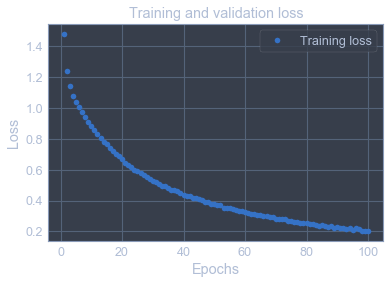

In [17]:
# 搭建网络
model = Sequential()
model.add(Dense(64,input_dim=4, activation='relu'))
model.add(Dense(3,input_dim=64,activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100)

loss = cost.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
loss[-1]

0.2007496734460195

In [22]:
test_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

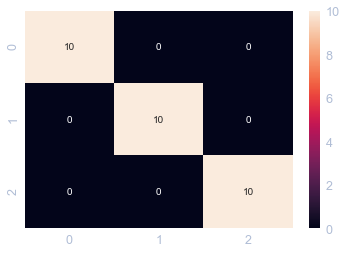

In [25]:
y_pred = model.predict_classes(X_test)

c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 增加层数

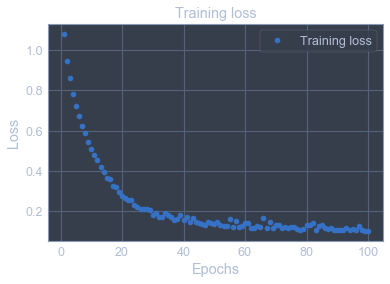

In [30]:
# 搭建网络
model = Sequential()
model.add(Dense(8,input_dim=4, activation='relu'))
model.add(Dense(32,input_dim=8,activation='relu'))
model.add(Dense(64,input_dim=32,activation='relu'))
model.add(Dense(8,input_dim = 64,activation='relu'))
model.add(Dense(3,input_dim=64,activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0)

loss = cost.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
loss[-1]

0.10049996972084045

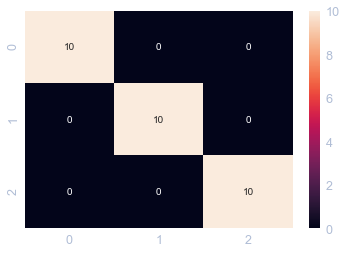

In [32]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

## 增加层数同时减少迭代次数

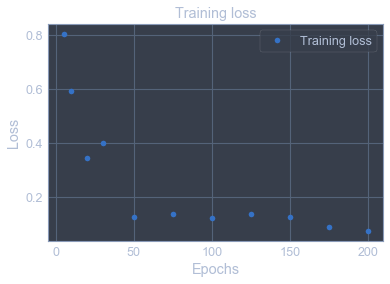

In [33]:
# 搭建网络
losses = []
epochs = [5,10,20,30,50,75,100,125,150,175,200]

for epoch in epochs:
    model = Sequential()
    model.add(Dense(8,input_dim=4, activation='relu'))
    model.add(Dense(32,input_dim=8,activation='relu'))
    model.add(Dense(64,input_dim=32,activation='relu'))
    model.add(Dense(3,input_dim=64,activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
    cost = model.fit(X_train,
                 y_train,
                 epochs=epoch,verbose=0)

    losses.append(cost.history['loss'][-1])
    

plt.plot(epochs, losses, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

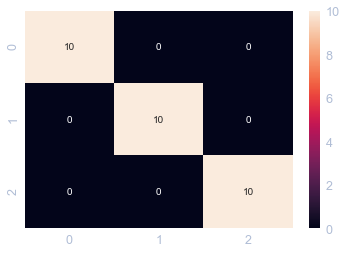

In [34]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 增加神经元

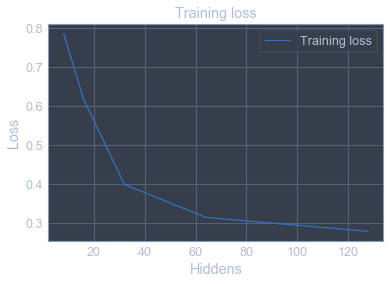

In [35]:
# 搭建网络
hiddens = [8, 16, 32, 64, 128]
losses = []
for hidden in hiddens:
    model = Sequential()
    model.add(Dense(hidden, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=hidden, activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0)

    losses.append(cost.history['loss'][-1])

plt.plot(hiddens, losses, label='Training loss')
plt.title('Training loss')
plt.xlabel('Hiddens')
plt.ylabel('Loss')
plt.legend()
plt.show()

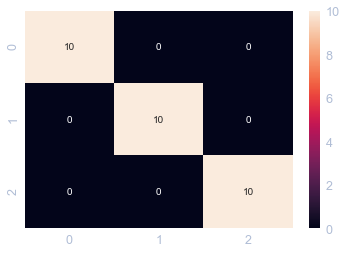

In [36]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 改变优化函数

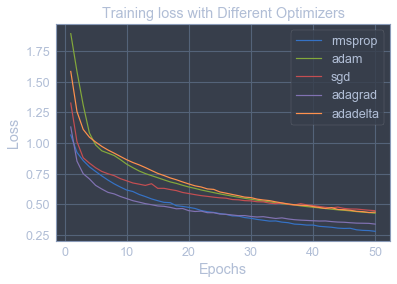

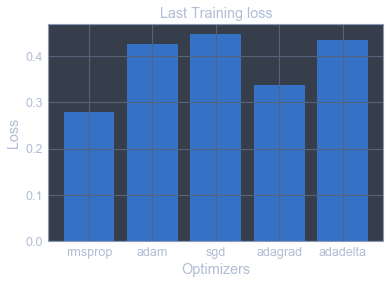

In [12]:
# 搭建网络
opts = ['rmsprop', 'adam', 'sgd', 'adagrad', 'adadelta']
losses = []
for opt in opts:
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=64, activation='softmax'))

    # 编译模型
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0)

    losses.append(cost.history['loss'][-1])
    loss = cost.history['loss']
    epochs = range(1, 50 + 1)
    plt.plot(epochs, loss, label='%s' % opt)

plt.title('Training loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.bar(opts, losses)
plt.title('Last Training loss')
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.show()